In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

Завантажити дані, вивести на екран назви колонок і розмір датасета

In [59]:
# Load csv
dsr= pd.read_csv('Paris.csv',encoding="ISO-8859-1")
# Column name
print(dsr.columns.values)
#Dataset shape 
print (dsr.shape)

['squareMeters' 'numberOfRooms' 'hasYard' 'hasPool' 'floors' 'cityCode'
 'cityPartRange' 'numPrevOwners' 'made' 'isNewBuilt' 'hasStormProtector'
 'basement' 'attic' 'garage' 'hasStorageRoom' 'hasGuestRoom' 'price'
 'category']
(10000, 18)


Опрацювати пропуски (по можливості заповнити їх або видалити)

In [60]:
print(dsr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

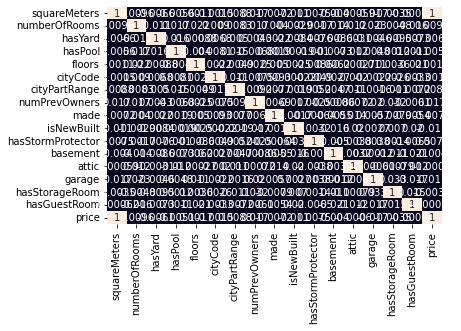

In [61]:
sns.heatmap(dsr.corr(), annot = True, cbar=False)
plt.show()

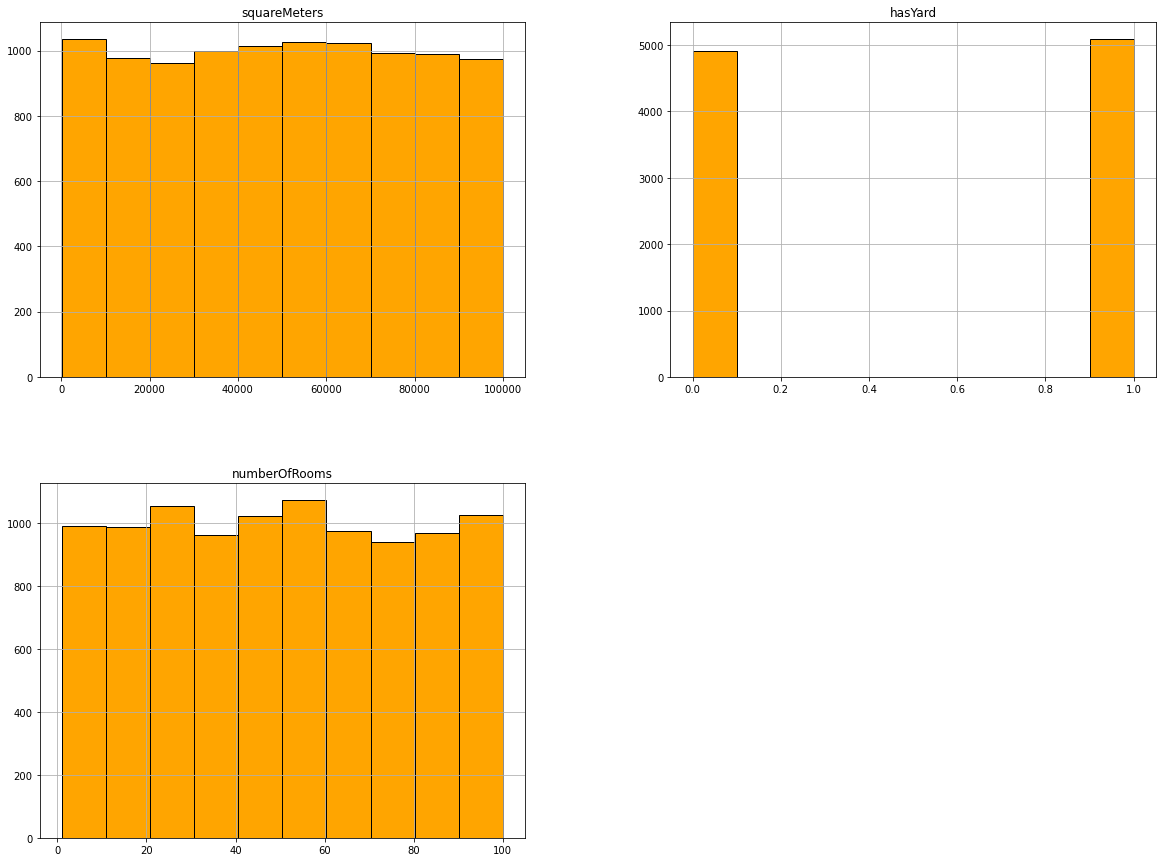

In [62]:
column_name = ['squareMeters','hasYard', 'numberOfRooms']
dsr.loc[:,column_name].hist(color='orange', edgecolor='black', figsize=(20,15))
plt.show()

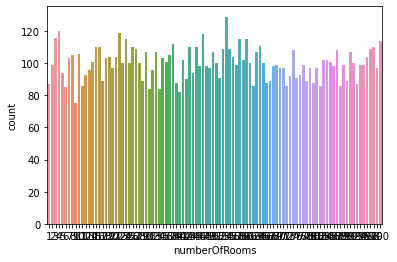

In [26]:
sns.countplot(x='numberOfRooms', data=dsr)
plt.show()

<AxesSubplot:xlabel='hasGuestRoom', ylabel='numberOfRooms'>

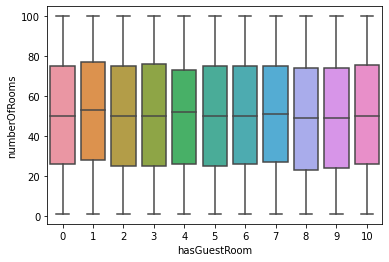

In [28]:
sns.boxplot(x=dsr["hasGuestRoom"],y=dsr["numberOfRooms"])

<AxesSubplot:xlabel='hasStorageRoom', ylabel='numberOfRooms'>

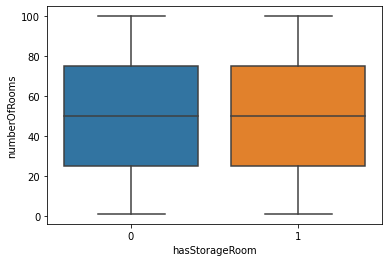

In [29]:
sns.boxplot(x=dsr["hasStorageRoom"],y=dsr["numberOfRooms"])

Нормалізувати дані

In [66]:
scaler = StandardScaler()
scaler.fit(dsr.drop(columns=["category"], axis=1))
scaled_features = pd.DataFrame(scaler.transform(dsr.drop(columns=["category"], axis=1)))

In [67]:
dsr.columns[2:-1]

Index(['hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange',
       'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement',
       'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price'],
      dtype='object')

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, dsr['category'], random_state=0)

kNN оптимальний парметр

Text(0, 0.5, 'Error Rate')

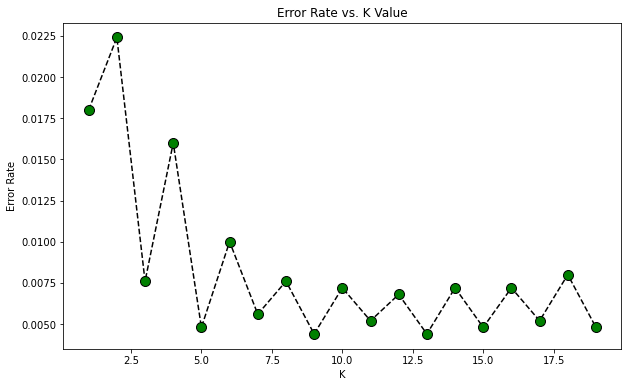

In [86]:
error_rate = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    predict = knn.predict(X_test)
    error_rate.append(np.mean(predict != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

kNN


In [88]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)
print('K = 2')
print(confusion_matrix(Y_test, prediction))
print('\n')
print(classification_report(Y_test, prediction))

K = 2
[[2178    2]
 [  54  266]]


              precision    recall  f1-score   support

       Basic       0.98      1.00      0.99      2180
      Luxury       0.99      0.83      0.90       320

    accuracy                           0.98      2500
   macro avg       0.98      0.92      0.95      2500
weighted avg       0.98      0.98      0.98      2500



Дерево прийняття рішень і візуалізувати його

In [89]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(scaled_X_train, y_training_data)
predictions1 = model1.predict(scaled_X_test)
print(classification_report(y_test_data, predictions1))
print(confusion_matrix(y_test_data,predictions1))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      3512
      Luxury       1.00      1.00      1.00       488

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[3512    0]
 [   0  488]]


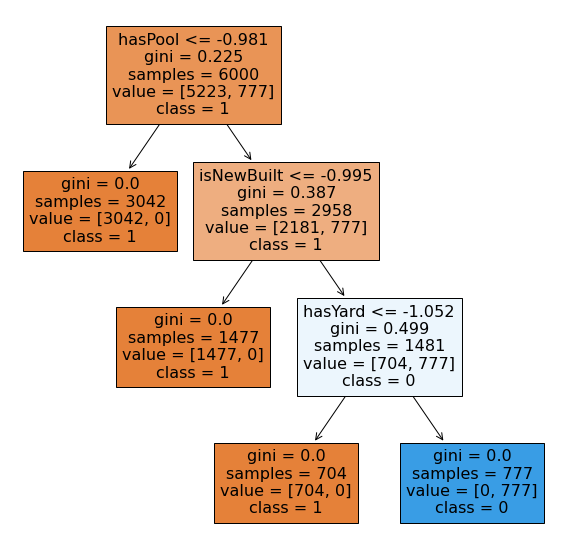

In [90]:
plt.figure(figsize = (10, 10))
tree.plot_tree(model1, feature_names = x_training_data.columns, class_names= ['1', '0'], filled = True)
plt.show()

SVM

In [91]:
model2 = SVC(C=1, gamma = 0.01, kernel = 'rbf')
model2.fit(scaled_X_train,y_training_data)
predictions2 = model2.predict(scaled_X_test)
print(classification_report(y_test_data, predictions2))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      3512
      Luxury       1.00      1.00      1.00       488

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



Для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

In [92]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_training_data)
print(grid.best_params_)
grid_predictions = grid.predict(scaled_X_test)
print(classification_report(y_test_data,grid_predictions))
print(confusion_matrix(y_test_data,grid_predictions))

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      3512
      Luxury       1.00      1.00      1.00       488

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[3512    0]
 [   0  488]]


Random Forest

In [93]:
model4 = RandomForestClassifier(random_state=0)
model4.fit(scaled_X_train,y_training_data)
predictions4 = model4.predict(scaled_X_test)
print(classification_report(y_test_data, predictions4))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      3512
      Luxury       1.00      1.00      1.00       488

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



За допомогою GridSearch підібрати оптимальні параметри для Random Forest

In [95]:
param_grid2 = {'criterion': ["entropy","gini"],'max_depth' : [2, 5, 10, 20, None],}
gridForest = GridSearchCV(RandomForestClassifier(), param_grid2, n_jobs=-1)
gridForest.fit(scaled_X_train, y_training_data)
print(gridForest.best_params_)
grid_predictions2 = gridForest.predict(scaled_X_test)
print(classification_report(y_test_data,grid_predictions2))
print(confusion_matrix(y_test_data,grid_predictions2))

{'criterion': 'entropy', 'max_depth': 5}
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      3512
      Luxury       1.00      1.00      1.00       488

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[3512    0]
 [   0  488]]


AdaBoost

In [96]:
model3 = AdaBoostClassifier(n_estimators=100, random_state=0)
model3.fit(scaled_X_train,y_training_data)
predictions3 = model3.predict(scaled_X_test)
print(classification_report(y_test_data, predictions3))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      3512
      Luxury       1.00      1.00      1.00       488

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



За допомогою GridSearch підібрати оптимальні параметри для AdaBoost

In [97]:
param_grid1 = {'n_estimators': [100, 200, 300, 400], 'learning_rate' : [0.01,0.05,0.1,0.3,1],}
gridAdaBoost = GridSearchCV(AdaBoostClassifier(), param_grid1, n_jobs=-1)
gridAdaBoost.fit(scaled_X_train, y_training_data)
print(gridAdaBoost.best_params_)
grid_predictions1 = gridAdaBoost.predict(scaled_X_test)
print(classification_report(y_test_data,grid_predictions1))
print(confusion_matrix(y_test_data,grid_predictions1))

{'learning_rate': 0.01, 'n_estimators': 100}
              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      3512
      Luxury       1.00      1.00      1.00       488

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[3512    0]
 [   0  488]]
